In [13]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#sns.set(font_scale=1.5, rc={'text.usetex' : True})
from scipy.interpolate import griddata
from sklearn.manifold import MDS
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
mean_blue = np.array([0.35, 0.4])
mean_orange = np.array([0.65, 0.25])

blue   = np.random.multivariate_normal(mean_blue, [[0.001, 0], [0, 0.001]], 5000)
orange = np.random.multivariate_normal(mean_orange, [[0.002, 0], [0, 0.002]], 5000)

In [17]:
data = pd.DataFrame([
    *[(x, y, 0, 1 - np.linalg.norm(np.array([x, y]) - mean_blue), 1)   for x, y in blue],
    *[(x, y, 0, 0.9 - np.linalg.norm(np.array([x, y]) - mean_orange), 1) for x, y in orange],
], columns=["x", "y", "color", "quality", "size"])
#data = data.sort_values("quality").reset_index(drop=True)
#data = data.append({'x': mean_blue[0], 'y': mean_blue[1], 'color': 1, 'quality': 1, 'size': 5, }, ignore_index=True)
#data = data.append({'x': mean_orange[0], 'y': mean_orange[1], 'color': 2, 'quality': 0.9, 'size': 5}, ignore_index=True)
data

,x,y,color,quality,size
0,0.383146,0.378982,0,0.960752,1
1,0.329658,0.418898,0,0.972235,1
2,0.410393,0.411294,0,0.938560,1
3,0.262026,0.410583,0,0.911392,1
4,0.358965,0.367722,0,0.966500,1
...,...,...,...,...,...
9995,0.681009,0.200518,0,0.841605,1
9996,0.641870,0.310596,0,0.838861,1
9997,0.665058,0.174365,0,0.822880,1
9998,0.733736,0.182242,0,0.792284,1


/var/folders/f2/dcxgc0gs1ggc8kk00xqhtl6h0000gn/T/ipykernel_97891/1175078738.py:27: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  p1 = sns.scatterplot(data=pd.concat([data.sample(n=100), data[data.color != 0]]),
/var/folders/f2/dcxgc0gs1ggc8kk00xqhtl6h0000gn/T/ipykernel_97891/1175078738.py:27: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  p1 = sns.scatterplot(data=pd.concat([data.sample(n=100), data[data.color != 0]]),


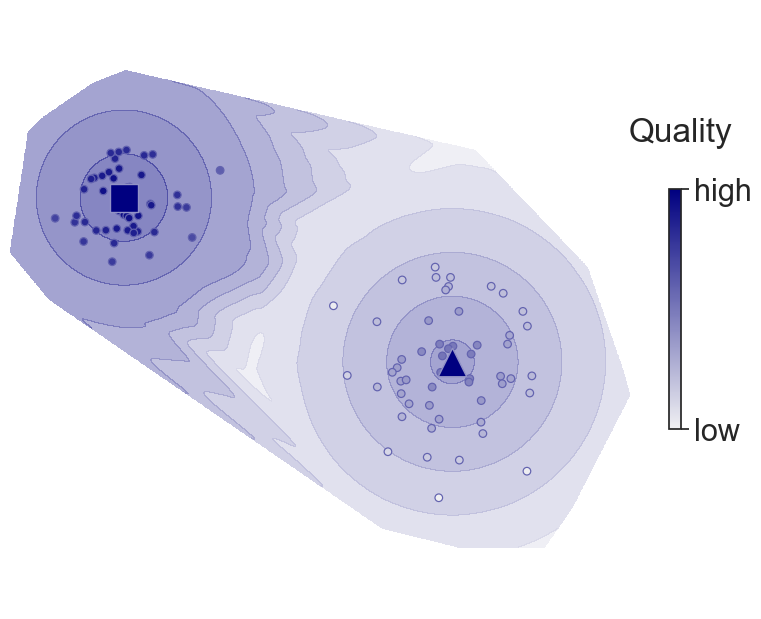

In [59]:
x = data.x.values
y = data.y.values
quality = data.quality.values

def contour(x, y, quality, resolution=1000, contour_method='cubic'):
    resolution = f"{resolution}j"
    X, Y = np.mgrid[min(x):max(x):complex(resolution), min(y):max(y):complex(resolution)]
    points = list(zip(x, y))
    Z = griddata(points, quality, (X, Y), method=contour_method)
    return X, Y, Z

X, Y, Z = contour(x, y, quality)

palette = sns.light_palette("navy", reverse=False, as_cmap=True)
sns.set(style="white", font_scale=2)
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

plt.axis('equal')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])

p0 = ax.contourf(X, Y, Z, cmap=palette, alpha=0.5)

p1 = sns.scatterplot(data=pd.concat([data.sample(n=100), data[data.color != 0]]),
                     x='x', y='y',
                     hue="quality",
                     markers=['.', 's', '^'],
                     palette=palette,
                     edgecolor=palette(150),
                     #linewidths=5,
                     style="color",
                     size="size",
                     sizes=[120, 150],
                     legend=False,
                     alpha=1)

plt.scatter(mean_blue[0], mean_blue[1], color=palette(500), ec=palette(100), marker="s", s=400)
plt.scatter(mean_orange[0], mean_orange[1], color=palette(500), ec=palette(100), marker="^", s=420)

norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])


cbar = ax.figure.colorbar(sm, shrink=0.4, ticks=[0, 1])
cbar.ax.set_yticklabels(["low", "high"])
cbar.ax.set_ylabel("Quality", rotation=0)
cbar.ax.yaxis.set_label_coords(1, 1.3)

#plt.margins(0, 0)
#plt.gca().set_axis_off()
plt.subplots_adjust(top=0.6, bottom=0, wspace=0)

plt.savefig("results/schematic_solution_landscape.png", dpi=600, bbox_inches="tight")

In [62]:
mean = np.array([0.5, 0.5])
nodes = np.random.multivariate_normal(mean, [[0.01, 0], [0, 0.01]], 100000)
data = pd.DataFrame([
    *[(x, y, 1 - np.linalg.norm(np.array([x, y]) - mean))   for x, y in nodes],
], columns=["x", "y", "quality"])
data

,x,y,quality
0,0.417734,0.433997,0.894529
1,0.397548,0.450537,0.886233
2,0.444591,0.487718,0.943246
3,0.595530,0.555969,0.889282
4,0.536852,0.608528,0.885385
...,...,...,...
99995,0.387919,0.349944,0.812706
99996,0.537519,0.529703,0.952147
99997,0.592909,0.448879,0.893956
99998,0.251205,0.389331,0.727701


In [63]:
x = data.x.values
y = data.y.values
quality = data.quality.values

def contour(x, y, quality, resolution=1000, contour_method='cubic'):
    resolution = f"{resolution}j"
    X, Y = np.mgrid[min(x):max(x):complex(resolution), min(y):max(y):complex(resolution)]
    points = list(zip(x, y))
    Z = griddata(points, quality, (X, Y), method=contour_method)
    return X, Y, Z

X, Y, Z = contour(x, y, quality)

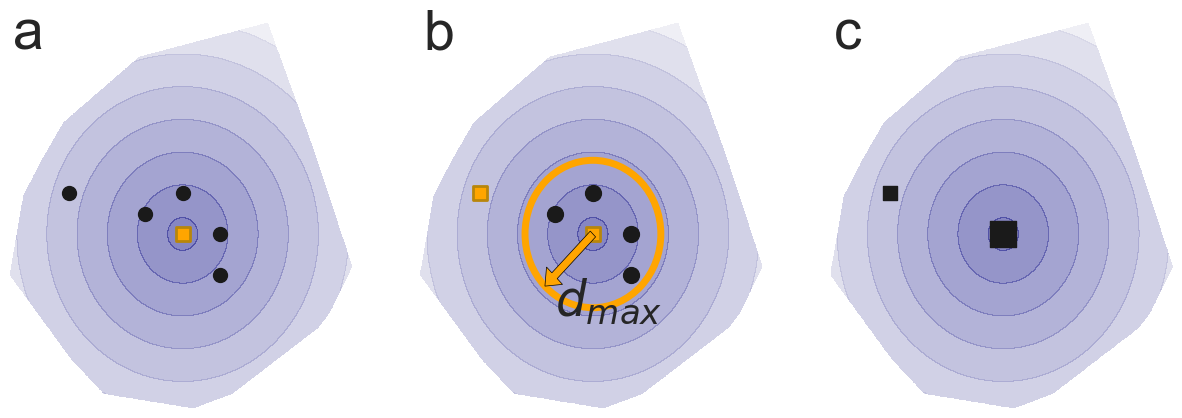

In [76]:
palette = sns.light_palette("navy", reverse=False, as_cmap=True)
sns.set(style="white", font_scale=1.5)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.despine(f, left=True, bottom=True)

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

xs = [0.4, 0.6, 0.5, 0.6]
ys = [0.55, 0.5, 0.6, 0.4]
outx = [0.2]
outy = [0.6]

ax1.text(0.05, 0.95, s="a", fontsize=40)
ax1.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax1.scatter([0.5], [0.5], color="orange", ec="darkgoldenrod", lw=2, marker="s", s=100)
ax1.scatter(xs, ys, color="k", s=100)
ax1.scatter(outx, outy, color="k", s=100)

ax2.text(0.05, 0.95, s="b", fontsize=40)
ax2.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax2.scatter([0.5], [0.5], color="orange", ec="darkgoldenrod", lw=2, marker="s", s=100)
ax2.scatter(xs, ys, color="k", s=130)
ax2.scatter(outx, outy, color="orange", ec="darkgoldenrod", lw=2, marker="s", s=100)

r = 0.18
circle = plt.Circle([0.5, 0.5], r, ec="orange", linewidth=5, fill=False)
ax2.add_patch(circle)

dx = r / np.sqrt(2)
arrow = plt.Arrow(0.5, 0.5, -dx, -dx, width=0.1, color="orange", ec="black", lw=0.5)
ax2.add_patch(arrow)

ax2.text(0.4, 0.3, s="$d_{max}$", fontsize=35)


ax3.text(0.05, 0.95, s="c", fontsize=40)
ax3.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax3.scatter([0.5], [0.5], color="k", marker="s", s=350)
ax3.scatter(outx, outy, color="k", marker="s", s=100)


plt.savefig("results/schematic_clustering.png", dpi=600, bbox_inches="tight")

In [ ]:
palette = sns.light_palette("navy", reverse=False, as_cmap=True)
sns.set(style="white", font_scale=1.5)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.despine(f, left=True, bottom=True)

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

xs = [0.4, 0.6, 0.5, 0.6]
ys = [0.55, 0.5, 0.6, 0.4]
outx = [0.2]
outy = [0.6]

ax1.text(0.05, 0.95, s="a", fontsize=40)
ax1.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax1.scatter([0.5], [0.5], color="k", marker="s", s=100)
ax1.scatter(xs, ys, color="k", s=100)
ax1.scatter(outx, outy, color="k", s=100)

ax2.text(0.05, 0.95, s="b", fontsize=40)
ax2.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax2.scatter([0.5], [0.5], color="orange", marker="s", ec="darkgoldenrod", s=100)
ax2.scatter(xs, ys, color="orange", ec="darkgoldenrod", s=130)
ax2.scatter(outx, outy, color="lightslategray", s=100)

r = 0.18
circle = plt.Circle([0.5, 0.5], r, edgecolor="orange", linewidth=5, fill=False)
ax2.add_patch(circle)

dx = r / np.sqrt(2)
arrow = plt.Arrow(0.5, 0.5, -dx, -dx, width=0.1, color="orange", ec="black", lw="0.4")
ax2.add_patch(arrow)

ax2.text(0.4, 0.3, s="$d_{max}$", fontsize=35)


ax3.text(0.05, 0.95, s="c", fontsize=40)
ax3.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax3.scatter([0.5], [0.5], color="k", marker="s", s=350)
ax3.scatter(outx, outy, color="k", marker="s", s=100)


#plt.savefig("results/schematic_clustering.png", dpi=600, bbox_inches="tight")

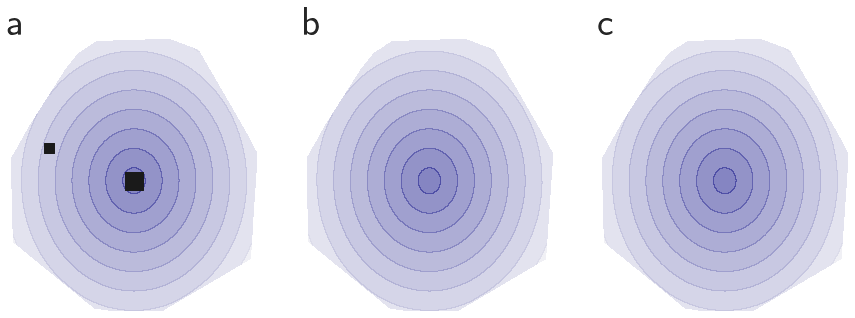

In [10]:
palette = sns.light_palette("navy", reverse=False, as_cmap=True)
sns.set(style="white", font_scale=1.5)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.despine(f, left=True, bottom=True)

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

xs = [0.4, 0.6, 0.5, 0.6]
ys = [0.55, 0.5, 0.6, 0.4]
outx = [0.2]
outy = [0.6]

ax1.text(0.05, 0.95, s="a", fontsize=40)
ax1.contourf(X, Y, Z, cmap=palette, alpha=0.5)
ax1.scatter([0.5], [0.5], color="k", marker="s", s=350)
ax1.scatter(outx, outy, color="k", marker="s", s=100)

ax2.text(0.05, 0.95, s="b", fontsize=40)
ax2.contourf(X, Y, Z, cmap=palette, alpha=0.5)


ax3.text(0.05, 0.95, s="c", fontsize=40)
ax3.contourf(X, Y, Z, cmap=palette, alpha=0.5)
#ax3.scatter([0.5], [0.5], color="k", marker="s", s=350)
#ax3.scatter(outx, outy, color="k", marker="s", s=100)


plt.savefig("results/schematic_core_comm.pdf", bbox_inches="tight")